<b><center>K Nearest Neighbors Classification

This notebook performs classification based on the K Nearest Neighbors Algorithm.

In [1]:
### Imports
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\steff\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<b><center>Understanding the Data

In [2]:
### Load the Data
trainX = pd.read_csv('train_data_z.csv', header = 0)
testX = pd.read_csv('test_data_z.csv', header = 0)
trainY = pd.read_csv('train_target.csv', header = 0)
testY = pd.read_csv('test_target.csv', header = 0)

In [3]:
#Remove the Row Number Column from Y datasets
trainX = trainX.drop('Unnamed: 0', axis = 1)
testX = testX.drop('Unnamed: 0', axis = 1)
trainY = trainY.drop('Unnamed: 0', axis = 1)
testY = testY.drop('Unnamed: 0', axis = 1)

In [4]:
#Look at the shapes of each dataset
print('TrainX is: ', trainX.shape)
print('TrainY is: ', trainY.shape)
print('TestX is: ', testX.shape)
print('TestY is: ', testY.shape)

TrainX is:  (1600, 15)
TrainY is:  (1600, 1)
TestX is:  (400, 15)
TestY is:  (400, 1)


In [5]:
### Change the Data into Numpy Arrays
trainX_np = np.array(trainX)
trainY_np = np.array(trainY)
testX_np = np.array(testX)
testY_np = np.array(testY)

<b><center>K Nearest Neighbors with Normalized Data

In [6]:
### Running KNN with Grid Search Method

# Set Options for KNN
grid_params = {"n_neighbors": [3, 5, 7, 9], "weights": ['uniform', 'distance']}

# Run Iterations for KNN
gsKNN = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, cv = 10)
gsKNN_results = gsKNN.fit(trainX_np, trainY_np)

# Best Parameters
gsKNN_results.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

The best parameters based on the grid search above are 7 neighbors and a uniform weight. 

In [7]:
### Evaluate Model with Best Parameters and Fit to Training Data
knn = neighbors.KNeighborsClassifier(n_neighbors = 7, weights = 'uniform')
knn.fit(trainX_np, trainY_np)

KNeighborsClassifier(n_neighbors=7)

In [8]:
## Average Accuracy Scores For both Test and Training Data
print('Accuracy Score for Training: ', knn.score(trainX_np, trainY_np))
print('Accuracy Score for Testing ', knn.score(testX_np, testY_np))

Accuracy Score for Training:  0.704375
Accuracy Score for Testing  0.64


In [9]:
## Prediction on Testing Data
knn_pred = knn.predict(testX_np)

In [10]:
## Classification Report
print(classification_report(testY_np, knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        94
           1       0.55      0.47      0.51       106
           2       0.47      0.56      0.51        93
           3       0.71      0.75      0.73       107

    accuracy                           0.64       400
   macro avg       0.65      0.64      0.64       400
weighted avg       0.65      0.64      0.64       400



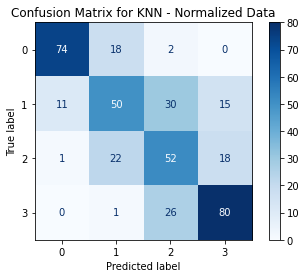

In [11]:
## Confusion Matrix with MatPlotLib
np.set_printoptions(precision=2)

## Non-normalized Confusion Matrix
plot_confusion_matrix(knn, testX_np, testY_np, cmap = plt.cm.Blues)
plt.title("Confusion Matrix for KNN - Normalized Data")
plt.show()

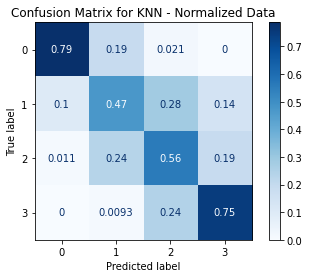

In [12]:
## Confusion Matrix with MatPlotLib
np.set_printoptions(precision=2)

## Non-normalized Confusion Matrix
plot_confusion_matrix(knn, testX_np, testY_np, cmap = plt.cm.Blues, normalize = 'true')
plt.title("Confusion Matrix for KNN - Normalized Data")
plt.show()

KNN with normalized data performed okay. The accuracy for the training set is at 0.70 and even lower for the testing set at 0.64. The confusion matrix shows the misclassifications for each label. Looking at the confusion matrix and the classification table, group 3 was predicted the best. 

<b><center>K Nearest Neighbors with One Principal Component

Before performing KNN, we need to prepare the data with one principal component. 

In [13]:
### Load the Data
trainX_pca1 = pd.read_csv('train_pca1.csv', header = None)
testX_pca1 = pd.read_csv('test_pca1.csv', header = None)

In [14]:
#Rename the columns for the X datasets
trainX_pca1.columns = ['PC1']
testX_pca1.columns = ['PC1']

In [15]:
#Look at the shapes of each dataset
print('TrainX PCA is: ', trainX_pca1.shape)
print('TestX PCA is: ', testX_pca1.shape)

TrainX PCA is:  (1600, 1)
TestX PCA is:  (400, 1)


In [16]:
### Change the Data into Numpy Arrays
trainX_pca1_np = np.array(trainX_pca1)
testX_pca1_np = np.array(testX_pca1)

We will run the K Nearest Neighbors Classification on the transformed PCA data with one principal component. KNN will be run using varous numbers of neighbors and weight types to determine which gives the best predictions. This was done using the gridsearch method. 

In [17]:
### Running KNN with Grid Search Method

# Set Options for KNN
grid_params = {"n_neighbors": [3, 5, 7, 9], "weights": ['uniform', 'distance']}

# Run Iterations for KNN
gsKNN = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, cv = 10)
gsKNN_results = gsKNN.fit(trainX_pca1_np, trainY_np)

# Best Parameters
gsKNN_results.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

Based on the grid search above, the best parameters for KNN are 9 nearest neigbors and a uniform weight. 

In [18]:
### Evaluate Model with Best Parameters and Fit to Training Data
knn = neighbors.KNeighborsClassifier(n_neighbors = 9, weights = 'uniform')
knn.fit(trainX_pca1_np, trainY_np)

KNeighborsClassifier(n_neighbors=9)

In [19]:
## Average Accuracy Scores For both Test and Training Data
print('Accuracy Score for Training: ', knn.score(trainX_pca1_np, trainY_np))
print('Accuracy Score for Testing ', knn.score(testX_pca1_np, testY_np))

Accuracy Score for Training:  0.571875
Accuracy Score for Testing  0.46


In [20]:
## Prediction on Testing Data
knn_pred = knn.predict(testX_pca1_np)

In [21]:
## Classification Report
print(classification_report(testY_np, knn_pred))

              precision    recall  f1-score   support

           0       0.61      0.73      0.67        94
           1       0.38      0.36      0.37       106
           2       0.39      0.38      0.38        93
           3       0.43      0.39      0.41       107

    accuracy                           0.46       400
   macro avg       0.45      0.47      0.46       400
weighted avg       0.45      0.46      0.45       400



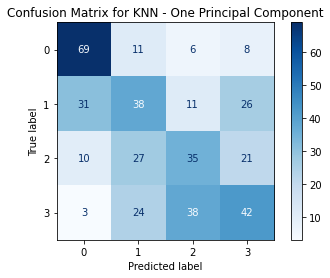

In [22]:
## Confusion Matrix with MatPlotLib
np.set_printoptions(precision=2)

## Non-normalized Confusion Matrix
plot_confusion_matrix(knn, testX_pca1_np, testY_np, cmap = plt.cm.Blues)
plt.title("Confusion Matrix for KNN - One Principal Component")
plt.show()

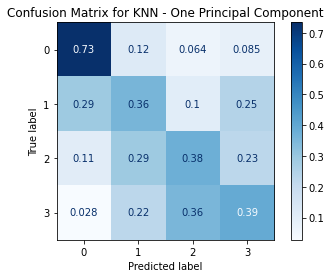

In [23]:
## Confusion Matrix with MatPlotLib - Normalize
np.set_printoptions(precision=2)

## Non-normalized Confusion Matrix
plot_confusion_matrix(knn, testX_pca1_np, testY_np, cmap = plt.cm.Blues, normalize = 'true')
plt.title("Confusion Matrix for KNN - One Principal Component")
plt.show()

KNN with one principal component performs worse than just the normalized data. The accuracy for the training set is pretty low at 0.57 and even lower for the testing set at 0.46. The confusion matrix above also shows a lot of misclassifications among all groups with group 0 still performing the best. 

<b><center>K Nearest Neighbors with Two Principal Components

Before performing KNN, we need to prepare the data wth two principal components. 

In [24]:
### Load the Data
trainX_pca2 = pd.read_csv('train_pca2.csv', delimiter = ' ', header = None)
testX_pca2 = pd.read_csv('test_pca2.csv', delimiter = ' ', header = None)

In [25]:
#Rename the columns for the X datasets
trainX_pca2.columns = ['PC1', 'PC2']
testX_pca2.columns = ['PC1', 'PC2']

In [26]:
#Look at the shapes of each dataset
print('TrainX PCA is: ', trainX_pca2.shape)
print('TestX PCA is: ', testX_pca2.shape)

TrainX PCA is:  (1600, 2)
TestX PCA is:  (400, 2)


In [27]:
### Change the Data into Numpy Arrays
trainX_pca2_np = np.array(trainX_pca2)
testX_pca2_np = np.array(testX_pca2)

We will run the K Nearest Neighbors Classification on the transformed PCA data with two principal components. Again, KNN will be run using varous numbers of neighbors and weight types to determine which gives the best predictions. This was done using the gridsearch method. 

In [28]:
### Running KNN with Grid Search Method

# Set Options for KNN
grid_params = {"n_neighbors": [3, 5, 7, 9], "weights": ['uniform', 'distance']}

# Run Iterations for KNN
gsKNN = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, cv = 10)
gsKNN_results = gsKNN.fit(trainX_pca2_np, trainY_np)

# Best Parameters
gsKNN_results.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [29]:
### Evaluate Model with Best Parameters and Fit to Training Data
knn = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
knn.fit(trainX_pca2_np, trainY_np)

KNeighborsClassifier()

In [30]:
## Average Accuracy Scores For both Test and Training Data
print('Accuracy Score for Training: ', knn.score(trainX_pca2_np, trainY_np))
print('Accuracy Score for Testing ', knn.score(testX_pca2_np, testY_np))

Accuracy Score for Training:  0.685
Accuracy Score for Testing  0.565


In [31]:
## Prediction on Testing Data
knn_pred = knn.predict(testX_pca2_np)

In [32]:
## Classification Report
print(classification_report(testY_np, knn_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.73        94
           1       0.47      0.37      0.41       106
           2       0.48      0.43      0.45        93
           3       0.58      0.69      0.63       107

    accuracy                           0.56       400
   macro avg       0.55      0.57      0.56       400
weighted avg       0.55      0.56      0.56       400



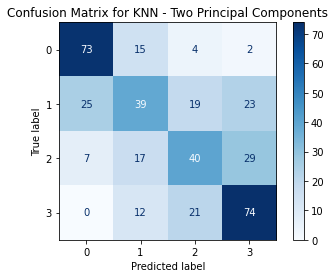

In [33]:
## Confusion Matrix with MatPlotLib
np.set_printoptions(precision=2)

## Non-normalized Confusion Matrix
plot_confusion_matrix(knn, testX_pca2_np, testY_np, cmap = plt.cm.Blues)
plt.title("Confusion Matrix for KNN - Two Principal Components")
plt.show()

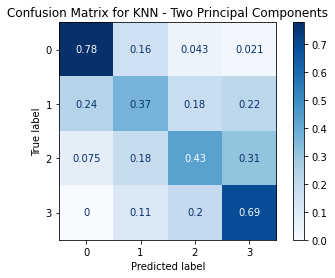

In [34]:
## Confusion Matrix with MatPlotLib - Normalized
np.set_printoptions(precision=2)

## Non-normalized Confusion Matrix
plot_confusion_matrix(knn, testX_pca2_np, testY_np, cmap = plt.cm.Blues, normalize = 'true')
plt.title("Confusion Matrix for KNN - Two Principal Components")
plt.show()

KNN with two principal components performs slightly better than the KNN with one principal component but not as well as the normalized data. The accuracy for the training set is at 0.68 and for the testing set it is 0.56. The confusion matrix above also shows a lot of misclassifications among all groups with group 0 still performing the best. 

In all, the KNN with all features and normalized values performed the best with a training accuracy of 0.7 and a testing accuracy of 0.64. This was the best KNN model with this data. 